In [2]:
import tensorflow as tf
tf.enable_eager_execution()

### 基本使用

In [3]:
x = tf.ones([2,2])

In [4]:
# 使用梯度带 计算与输入变量相关的微分
with tf.GradientTape() as t:
    # 记录要计算的张量
    t.watch(x)
    y = tf.square(tf.reduce_sum(x))

In [6]:
dy_dx = t.gradient(y, x)

### 计算高阶微分

In [12]:
# 变量类型的张量会自动计算
x2 = tf.Variable(3.0) 

In [36]:
# 可以计算高阶的微分
with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x2 * x2 * x2
        dy_dx = t2.gradient(y, x2)
        d2y_dx2 = t.gradient(dy_dx, x2)

In [37]:
d2y_dx2

<tf.Tensor: id=115, shape=(), dtype=float32, numpy=18.0>

### 拟合线性模型

In [64]:
import numpy as np

array([0.18728539])

In [66]:
# 封装模型中的变量和计算
class Model(object):
    def __init__(self):
        self.W = tf.Variable(np.random.random())
        self.b = tf.Variable(np.random.random())
        
    def __call__(self, x):
        return self.W * x + self.b

In [69]:
model = Model()
model([1,2])

<tf.Tensor: id=410, shape=(2,), dtype=float32, numpy=array([1.0951003, 1.9600198], dtype=float32)>

In [49]:
# 定义损失函数
def loss(predict_y, y):
    return tf.reduce_mean(tf.square(predict_y - y))

In [55]:
# 获取训练数据
TRUE_W = 3.0
TRUE_b = 2.0
MAX_EXAMPLES = 100

train_data_x = tf.random.normal([MAX_EXAMPLES])
train_data_y = train_data_x * TRUE_W + TRUE_b + tf.random.normal([MAX_EXAMPLES])

In [56]:
import matplotlib.pyplot as plt

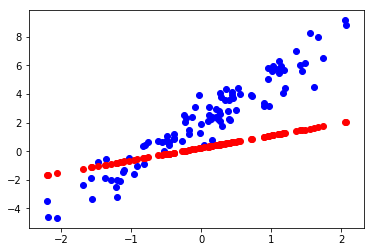

In [70]:
plt.scatter(train_data_x, train_data_y, c='b')
plt.scatter(train_data_x, model(train_data_x), c='r')
plt.show()

In [76]:
# 定义模型的训练方法
def train(model, inputs, outputs, learning_rate = 0.1):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        # 同时对 W 和 b 计算梯度
        dW, db = t.gradient(current_loss, [model.W, model.b])
        model.W.assign_sub(learning_rate * dW)
        model.b.assign_sub(learning_rate * db)

In [85]:
# 进行模型训练
model = Model()

Ws, bs = [], []
epochs = range(20)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    
    train(model, train_data_x, train_data_y)
    
    current_loss = loss(model(train_data_x), train_data_y)
    
    print('Epochs %s: W = %s, b = %s, loss = %s' %(epoch, Ws[-1], bs[-1], current_loss.numpy()))

Epochs 0: W = 0.011080801, b = 0.0033542728, loss = 8.952646
Epochs 1: W = 0.5827451, b = 0.44731995, loss = 5.959471
Epochs 2: W = 1.042367, b = 0.7963101, loss = 4.0555773
Epochs 3: W = 1.4119922, b = 1.0705316, loss = 2.8439307
Epochs 4: W = 1.7093122, b = 1.2859113, loss = 2.072423
Epochs 5: W = 1.9485273, b = 1.4549997, loss = 1.5808973
Epochs 6: W = 2.1410384, b = 1.5876833, loss = 1.267567
Epochs 7: W = 2.2960005, b = 1.6917483, loss = 1.0677097
Epochs 8: W = 2.420767, b = 1.7733244, loss = 0.9401517
Epochs 9: W = 2.521246, b = 1.8372359, loss = 0.8586857
Epochs 10: W = 2.6021845, b = 1.8872786, loss = 0.806622
Epochs 11: W = 2.6673982, b = 1.9264374, loss = 0.7733258
Epochs 12: W = 2.7199547, b = 1.9570591, loss = 0.75201684
Epochs 13: W = 2.7623208, b = 1.9809881, loss = 0.73836935
Epochs 14: W = 2.7964804, b = 1.9996731, loss = 0.72962224
Epochs 15: W = 2.8240297, b = 2.0142517, loss = 0.7240116
Epochs 16: W = 2.8462532, b = 2.0256166, loss = 0.7204097
Epochs 17: W = 2.864184

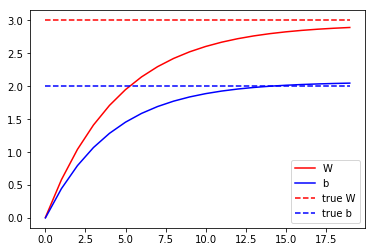

In [86]:
# 绘图
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot(epochs, len(epochs) * [TRUE_W], 'r--', epochs, len(epochs) * [TRUE_b], 'b--')
plt.legend(['W','b', 'true W', 'true b'])
plt.show()